# Lista de Análise de regressão e Correlação

### Aluno: Dionisio Alves da Silva Neto
### Matrícula: 202007840008
### Data: 07/02/2022 

### Bibliotecas Utilizadas

In [1]:
import pandas as pd                               ## Manipulação de dados
import matplotlib.pyplot as plt                   ## Gráficos
import seaborn as sns                             ## Gráficos
import numpy as np                                ## Álgebra Linear
from math import pi                               ## Número pi

from sklearn.linear_model import LinearRegression ## Modelo de Regressão Linear
from sklearn.metrics import r2_score              ## Métrica do R quadrado
from sklearn.metrics import mean_absolute_error   ## Métrica do EAM
from sklearn.metrics import mean_squared_error    ## Métrica do EQM

In [2]:
import warnings ## Excluir alguns avisos para armonizar o projeto
warnings.filterwarnings('ignore')

### Importação e tratamento do banco de dados

In [3]:
df = pd.read_csv('C:/Users/Dionisio/Desktop/Dionisio_Neto/faculdade/regressao_correlacao/Material_UFPR/codigosR/regressao_multipla\Atletas.csv',
                sep = ';', index_col = 0)

Observando o cabeçalho da tabela atletas

In [4]:
df.head() ## 5 primeiras linhas

,escore,idade,imc,horas,massa,gasto,estudo
1,"79,6",30,"20,5",19,"21,66",72,15
2,"80,7",30,21,23,"20,5",130,15
3,"65,6",23,"21,3",13,"19,39",68,10
4,75,23,"22,7",16,"23,41",64,11
5,"84,6",27,"22,6",20,"20,72",101,12


In [5]:
df.shape ## Dimensão da tabela

(200, 7)

Variáveis dentro do banco de dados:

In [6]:
df.columns 

Index(['escore', 'idade', 'imc', 'horas', 'massa', 'gasto', 'estudo'], dtype='object')

- idade: Idade da atleta (em anos);
- imc: Índice de massa corporal (kg/cm^2);
- horas: Horas de treino semanal;
- massa: Percentual de massa gorda;
- gasto: Gasto semanal com suplementos alimentares (reais);
- estudo: Anos de estudo;
- escore: Escore de desempenho nas últimas provas (numa escala de 0 a 100).

In [7]:
df.info() ## Informações mais detalhadas do banco de dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   escore  200 non-null    object
 1   idade   200 non-null    int64 
 2   imc     200 non-null    object
 3   horas   200 non-null    int64 
 4   massa   200 non-null    object
 5   gasto   200 non-null    int64 
 6   estudo  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 12.5+ KB


Verificando se há valores ausentes:

In [8]:
df.isna().sum()

escore    0
idade     0
imc       0
horas     0
massa     0
gasto     0
estudo    0
dtype: int64

Se analizamos atentamente o banco de dados, percebe-se que os valores do escore, imc e massa foram digitalizados utilizando a vírgula como o separador de decimais:

In [9]:
df.head()

,escore,idade,imc,horas,massa,gasto,estudo
1,"79,6",30,"20,5",19,"21,66",72,15
2,"80,7",30,21,23,"20,5",130,15
3,"65,6",23,"21,3",13,"19,39",68,10
4,75,23,"22,7",16,"23,41",64,11
5,"84,6",27,"22,6",20,"20,72",101,12


Dessa maneira, deve-se mudar de vírgula para ponto, devido ao fato do Python 3 codificar apenas pontos como separador de decimais.

In [10]:
## escore, imc e massa vieram com vírgula
## devemos trocar a vírgula por pontos para poder calcular
df['escore'] = df['escore'].str.replace(",",".").astype('float64')
df['massa'] = df['massa'].str.replace(',', '.').astype("float64")
df['imc'] = df['imc'].str.replace(",", ".").astype("float64")

Agora, percebe-se que tudo está como numérico:

In [11]:
df.dtypes 

escore    float64
idade       int64
imc       float64
horas       int64
massa     float64
gasto       int64
estudo      int64
dtype: object

## a)
Faça uma análise exploratória dos dados. Construa gráficos uni e bivariados, 
calcule medidas de locação e dispersão para cada variável, 
obtenha as correlações;

### Tabela de estatísticas

In [12]:
df.columns

Index(['escore', 'idade', 'imc', 'horas', 'massa', 'gasto', 'estudo'], dtype='object')

In [13]:
df.describe().round(4)
## Aqui temos a quantidade, a média, o desvio padrão, o mínimo, o máximo, a mediana e os quantis

,escore,idade,imc,horas,massa,gasto,estudo
count,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000
mean,75.0000,24.4200,21.6895,17.7700,20.8376,84.0000,11.1550
std,11.2392,2.8819,1.2326,4.3936,1.5014,25.5461,2.1292
min,48.3000,18.0000,17.4000,10.0000,15.5600,29.0000,6.0000
25%,66.8000,23.0000,20.9000,14.0000,19.9450,64.0000,10.0000
50%,75.8500,24.0000,21.7000,18.0000,20.7050,83.5000,11.0000
75%,82.0250,27.0000,22.6000,21.0000,21.7300,103.0000,12.2500
max,98.1000,30.0000,24.3000,25.0000,24.5500,142.0000,17.0000


### Gráficos univariados

In [14]:
plt.style.use('seaborn-pastel') ## Ajustando um estilo para os gráficos 

#### Histogramas

Histograma da variável dependente (escore):

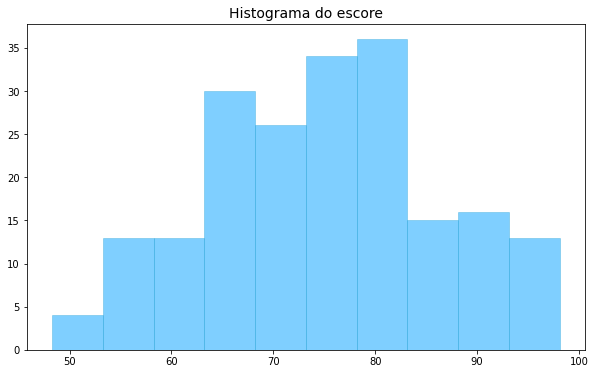

In [15]:
plt.figure(figsize = (10,6))
plt.hist(df['escore'],alpha = 0.6, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title("Histograma do escore", fontsize = 14)
plt.show()

Histogramas para cada uma das variáveis explicativas:

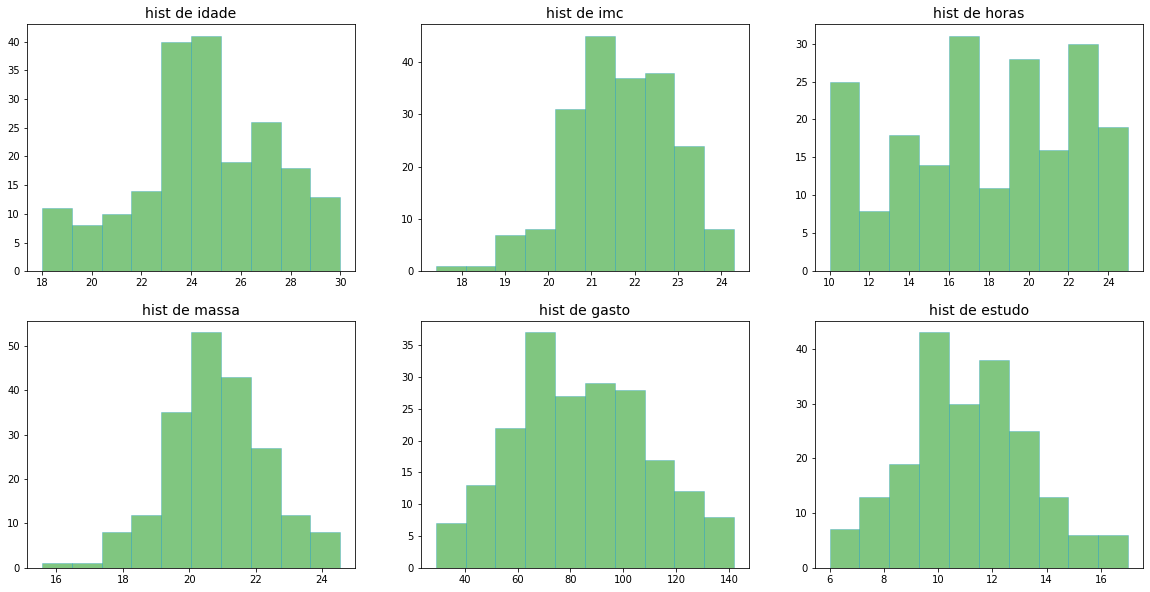

In [16]:
## variaveis explicativas
fig, axes = plt.subplots(2,3 , figsize = (20,10))

ax = axes.ravel()
for i, coluna in zip(range(6), df.iloc[:,1:].columns):## Excluindo a primeira coluna que é a variavel resposta
    ax[i].hist(df[coluna],alpha = 0.6, facecolor = 'tab:green', edgecolor='#169acf', linewidth=0.5)
    ax[i].set_title('hist de {}'.format(coluna),  fontsize = 14)

#### Boxplot

Boxplot para a variável dependente (escore):

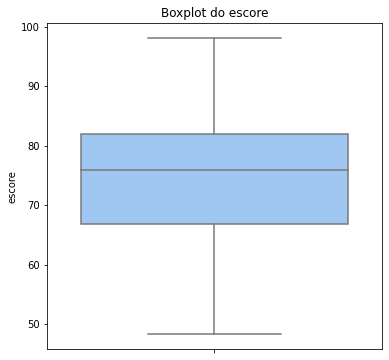

In [17]:
plt.figure(figsize = (6,6))
sns.boxplot(y = 'escore', data = df, orient = 'v')

plt.title("Boxplot do escore", fontsize = 12)
plt.show()

Boxplot para cada uma das variáveis explicativas:

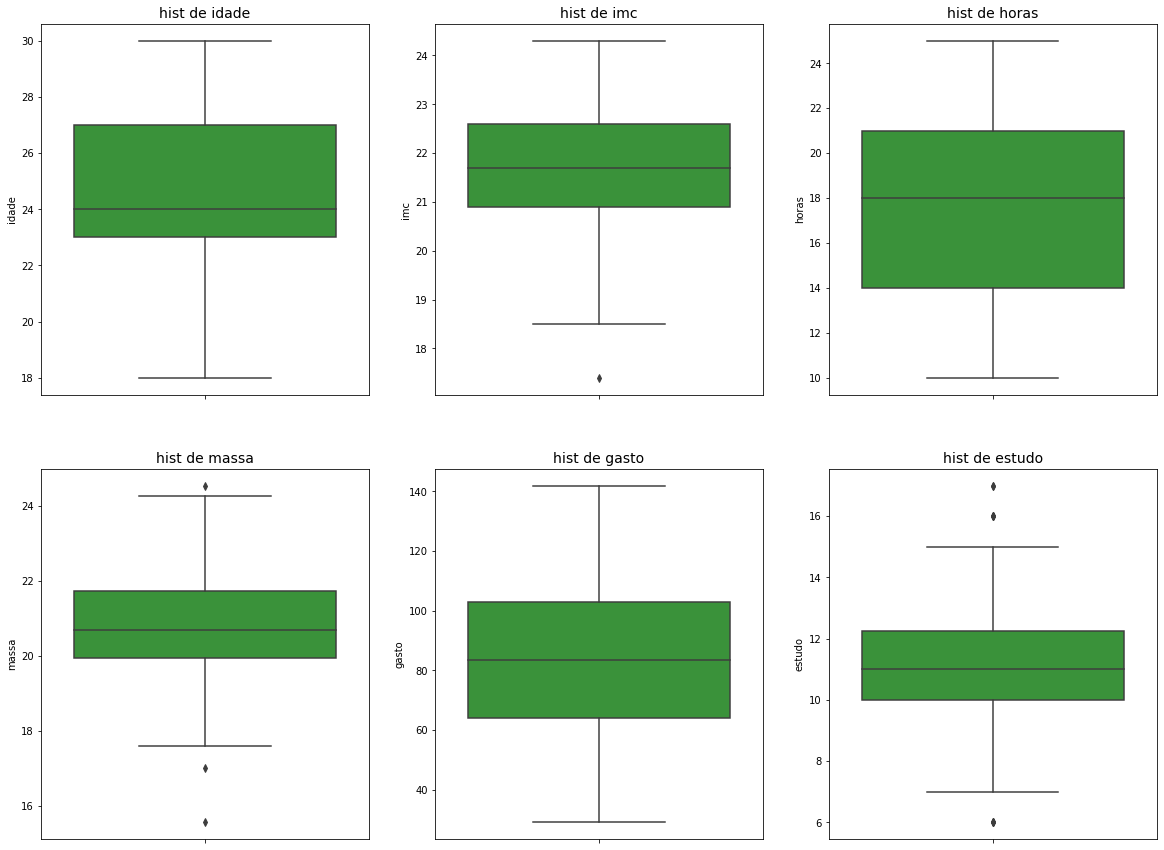

In [18]:
fig, axes = plt.subplots(2,3 , figsize = (20,15))

ax = axes.ravel()

for i, column in zip(range(6), df.iloc[:,1:]):
    sns.boxplot(y = column, data = df, color = 'tab:green', ax = ax[i])
    ax[i].set_title('hist de {}'.format(column), fontsize = 14)

Percebe-se que as variáveis **massa**, **gasto** e **estudo** apresentam outliers em suas colunas.

#### Gráfico de barras para a variável idade

Quantas pessoas tem por idade no banco de dados:

In [19]:
df['idade'].value_counts()

23    40
24    30
27    26
26    19
28    18
22    14
25    11
30    10
21    10
20     8
19     6
18     5
29     3
Name: idade, dtype: int64

Analizando a quantidade de elementos por porcentagem:

In [20]:
df['idade'].value_counts(normalize = True)

23    0.200
24    0.150
27    0.130
26    0.095
28    0.090
22    0.070
25    0.055
30    0.050
21    0.050
20    0.040
19    0.030
18    0.025
29    0.015
Name: idade, dtype: float64

In [21]:
df['idade'].value_counts(normalize = True).sort_values(ascending = False) ## ordenando

23    0.200
24    0.150
27    0.130
26    0.095
28    0.090
22    0.070
25    0.055
21    0.050
30    0.050
20    0.040
19    0.030
18    0.025
29    0.015
Name: idade, dtype: float64

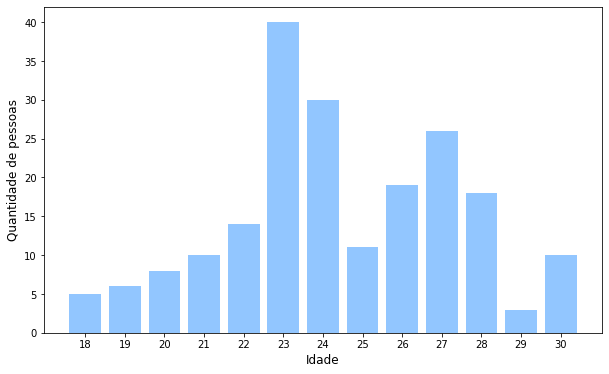

In [22]:
## gráfico de barras da variável idade

plt.figure(figsize = (10,6))
plt.bar(df['idade'].value_counts().index, df['idade'].value_counts().values)

plt.xticks(df['idade'].value_counts().index)
plt.xlabel("Idade", fontsize = 12)
plt.ylabel("Quantidade de pessoas", fontsize = 12)
plt.show()

Desse modo, nota-se que grande parte dos indivíduos estão concentrados entre 22 e 27 anos.

### Gráficos bivariados

In [23]:
## Ajustando a paleta de cores

colors = ['#9658BF','#7FEB8B', '#F5C941', '#7073E0', '#F57CC2', '#D26133'] 
# roxo, verde, amarelo, azul, rosa, vermelho queimado, 

Criando um gráfico de dispersão para cada uma das variáveis independentes com o escore:

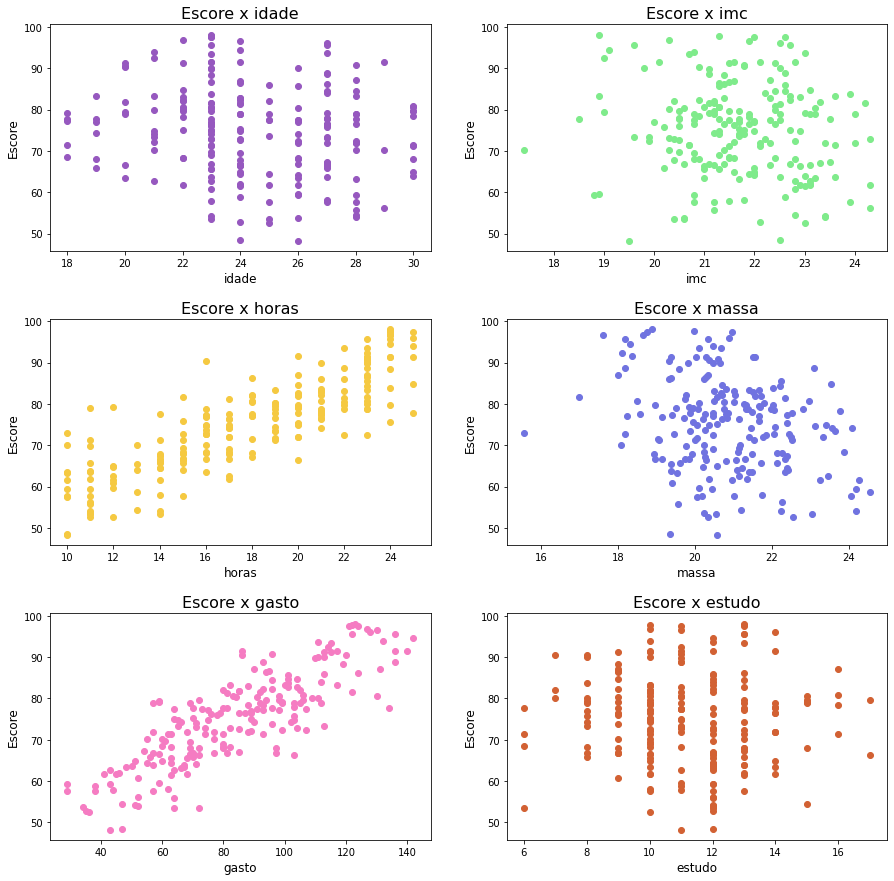

In [24]:
## scatter plot com a variável escore

fig, axes = plt.subplots(3,2, figsize = (15,15))
fig.subplots_adjust(hspace = 0.3)

ax = axes.ravel()

for i, coluna, color in zip(range(6), df.iloc[:,1:].columns, colors):
    ax[i].scatter(df[coluna], df['escore'], color = color)
    ax[i].set_title(f'Escore x {coluna}', fontsize = 16)
    ax[i].set_xlabel(coluna, fontsize = 12)
    ax[i].set_ylabel("Escore", fontsize = 12)

Observções:
- Linearidade com gasto e hora;
- Parece que há multicolinearidade em massa e imc, pelo fato dessas variáveis se comportarem de forma parecida com o escore.

#### Correlações

Calculando as correlações entre todas as variáveis do banco de dados:

In [25]:
corr = df.corr() ## calculando a correlação entre as variáveis
corr.round(4) ## matriz de correlação

,escore,idade,imc,horas,massa,gasto,estudo
escore,1.0000,-0.1501,-0.1168,0.8317,-0.2799,0.8335,-0.0544
idade,-0.1501,1.0000,0.0021,-0.0495,-0.0675,-0.0371,0.6756
imc,-0.1168,0.0021,1.0000,0.0030,0.3908,-0.1175,0.0887
horas,0.8317,-0.0495,0.0030,1.0000,-0.0403,0.8727,0.0054
massa,-0.2799,-0.0675,0.3908,-0.0403,1.0000,-0.3337,-0.0596
gasto,0.8335,-0.0371,-0.1175,0.8727,-0.3337,1.0000,0.0020
estudo,-0.0544,0.6756,0.0887,0.0054,-0.0596,0.0020,1.0000


Gráfico de mapa de calor para a vizualização das correlações entre as variáveis:

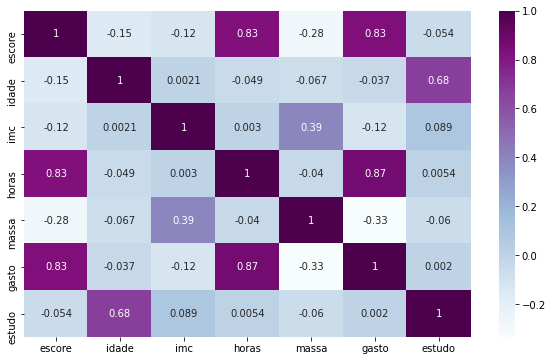

In [26]:
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, cmap ='BuPu')

plt.show()

Observações:
- A variável dependente tem forte correlação positiva com horas e gasto;
- Gasto e horas tem forte correlação positiva também;
- Idade e estudo tem moderata correlação postiva;
- Massa e gasto tem uma fraca correlação negativa.

## b)
Ajuste um modelo de regressão linear múltipla tomando o escore de desempenho como a variável resposta. Escreva a expressão do modelo ajustado;

## Ajustando o modelo de Regressão Linear Múltipla, com y = Escore.

### Separando as variáveis

In [27]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

#### Fazendo pelo método matricial

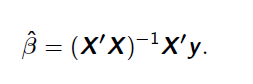

In [28]:
X[:5,:] ## 5 primeiras linhas de X

array([[ 30.  ,  20.5 ,  19.  ,  21.66,  72.  ,  15.  ],
       [ 30.  ,  21.  ,  23.  ,  20.5 , 130.  ,  15.  ],
       [ 23.  ,  21.3 ,  13.  ,  19.39,  68.  ,  10.  ],
       [ 23.  ,  22.7 ,  16.  ,  23.41,  64.  ,  11.  ],
       [ 27.  ,  22.6 ,  20.  ,  20.72, 101.  ,  12.  ]])

In [29]:
y[:5] ## 5 primeiras linhas de y

array([79.6, 80.7, 65.6, 75. , 84.6])

In [30]:
## Adicionando o vetor de 1's
ones = np.repeat(1,X.shape[0])

In [31]:
ones = ones.reshape(-1,1) ## formato vetor
ones.shape

(200, 1)

In [32]:
X_matrix = np.hstack([ones.reshape(-1,1), X]) ## juntando o vetor e a matrix

In [33]:
X_matrix

array([[  1.  ,  30.  ,  20.5 , ...,  21.66,  72.  ,  15.  ],
       [  1.  ,  30.  ,  21.  , ...,  20.5 , 130.  ,  15.  ],
       [  1.  ,  23.  ,  21.3 , ...,  19.39,  68.  ,  10.  ],
       ...,
       [  1.  ,  27.  ,  23.  , ...,  21.69,  99.  ,  15.  ],
       [  1.  ,  18.  ,  21.1 , ...,  19.52,  59.  ,   9.  ],
       [  1.  ,  24.  ,  21.2 , ...,  21.07,  59.  ,  10.  ]])

In [34]:
y_vetor = y.reshape(-1,1)
y_vetor.shape

(200, 1)

Calculando a matriz de betas:

In [35]:
parte1 = np.linalg.inv(np.matmul(X_matrix.T, X_matrix))

In [36]:
parte2 = np.matmul(X_matrix.T,y)

In [37]:
lista_betas = np.matmul(parte1, parte2)
lista_betas ## lista com todos os betas

array([83.39355814, -0.55917772, -0.22909211,  1.60564943, -1.34870955,
        0.09559331,  0.15886723])

In [38]:
## Vetor de betas
betas = lista_betas.reshape(-1,1)
betas

array([[83.39355814],
       [-0.55917772],
       [-0.22909211],
       [ 1.60564943],
       [-1.34870955],
       [ 0.09559331],
       [ 0.15886723]])

In [39]:
lista_betas[0]

83.39355813976726

In [40]:
df.columns[1:]

Index(['idade', 'imc', 'horas', 'massa', 'gasto', 'estudo'], dtype='object')

Expressão do modelo ajustado:

$$
\begin{equation}
\hat{Y} = 83.3936 - 0.5592 \times X_{1} - 0.2291 \times X_{2} +
 1.6056 \times X_{3} - 1.3487  \times X_{4} +  0.0956 \times X_{5}
\end{equation}
$$

In [41]:
print("Beta0 (intercepto): {:.4f}".format(lista_betas[0]))

for i, beta, variavel in zip(range(len(list(lista_betas[1:]))), list(lista_betas)[1:], df.columns[1:]):
    print("Beta{} ({}): {:.4f}".format(i+1,variavel, beta))

Beta0 (intercepto): 83.3936
Beta1 (idade): -0.5592
Beta2 (imc): -0.2291
Beta3 (horas): 1.6056
Beta4 (massa): -1.3487
Beta5 (gasto): 0.0956
Beta6 (estudo): 0.1589


## c)
Qual o valor ajustado pelo modelo para a primeira atleta da base? Qual o resíduo correspondente?

### Fazer predições

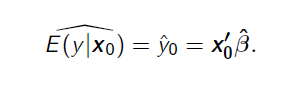

Extraíndo o valor da primeira atleta da matriz X:

In [42]:
x0 = X_matrix[0,:] 
x0 = x0.reshape(-1,1)
x0

array([[ 1.  ],
       [30.  ],
       [20.5 ],
       [19.  ],
       [21.66],
       [72.  ],
       [15.  ]])

In [43]:
betas.shape

(7, 1)

In [44]:
x0.T.shape ## Transposta do vetor x0

(1, 7)

In [45]:
predicao = np.matmul(x0.T, betas)
print(predicao.shape) ## Dimensão da predição
print("Valor predito para a primeira atleta: {:.4f}".format(float(predicao)))

(1, 1)
Valor predito para a primeira atleta: 72.4819


Resíduo correspondente para a primeira atleta:

In [46]:
residuo = float(y[0]) - float(predicao)
print("Resíduo correspondente para a primeira atleta: {:.4f}".format(residuo))

Resíduo correspondente para a primeira atleta: 7.1181


## d)
Qual a probabilidade estimada de um atleta com características semelhantes à 1ª atleta da base ter escore de desempenho superior a 80? E entre 65 e 75?

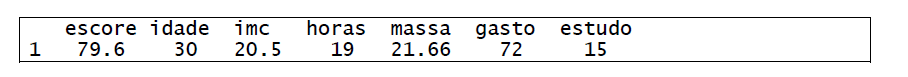

Calcular a matrix de variância das estimativas

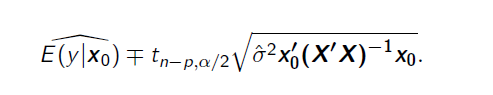

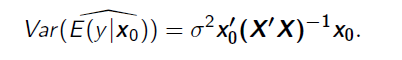

$$
\hat{\sigma^{2}} = QMR = \dfrac{SQR}{n - p} \quad| \quad \text{n = número de observações, p = coeficientes estimados}
$$

Estimando $\sigma^{2}$:

Estimaremos todos os valores da base de dados:

In [47]:
X_matrix.shape, betas.shape

((200, 7), (7, 1))

In [48]:
## Prevendo para toda a base de dados
predicoes = np.matmul(X_matrix, betas)
predicoes_lista = predicoes.reshape(1,-1).tolist()
predicoes.shape

(200, 1)

In [49]:
n = X_matrix.shape[0] ## número de indivíduos
p = betas.shape[0]    ## número de coeficientes estimados
print("n = ", n)
print("p = ", p)

n =  200
p =  7


In [50]:
residuos = y - predicoes_lista
residuos.shape

(1, 200)

In [51]:
## Soma dos quadrados dos resíduos
SQR = np.sum(residuos**2)
print("Soma dos quadrados dos resíduos: {:.4f}".format(SQR))

Soma dos quadrados dos resíduos: 5620.8514


In [52]:
## Quadrado médio dos resíduos
QMR = SQR / (n-p)
print("Quadrado médio dos resíduos: {:.4f}".format(QMR))

Quadrado médio dos resíduos: 29.1236


 Matriz $(X'X)^{-1}$

In [53]:
matrix_XX = np.linalg.inv(np.matmul(X_matrix.T, X_matrix))
matrix_XX.shape

(7, 7)

$$
\begin{equation}
\sigma^{2} x'_{0} (X'X)^{-1} x_{0} 
\end{equation}
$$

In [54]:
x0.T.shape, matrix_XX.shape, x0.shape

((1, 7), (7, 7), (7, 1))

In [55]:
## erro padrão para x0
ep_x0 = np.matmul(np.matmul(QMR * x0.T, matrix_XX),x0)
print("Erro padrão para x0: {:.4f}".format(float(ep_x0)))

Erro padrão para x0: 1.4173


$$
\widehat{E(y|x_{0})} \pm t_{n-p, \alpha/2} \sqrt{\sigma^{2} x'_{0} (X'X)^{-1} x_{0} }
$$

$$
80 = t_{193,\alpha/2} \times 1.4173 \\
t_{193,\alpha/2} = 56.4454
$$

A chance do perfil com tais características com esse perfil é quase inexistente, isto é, um valor muito abaixo de zero de acordo com o quantil 56.4454 aplicado na distribuição *t-student* com 193 graus de liberdade. 

## e)
Quais variáveis são estatisticamente significativas ao nível de 5% de significância?

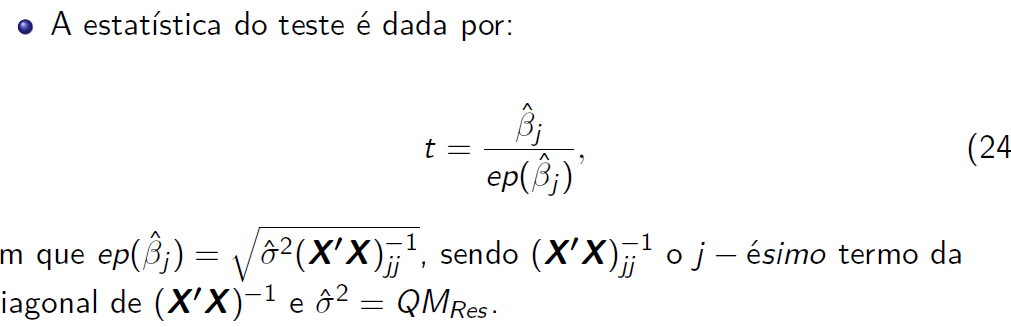

### H0: Beta vale zero
### H1: Beta não vale zero

$(X'X)^{-1}_{jj}$

In [56]:
diagonal = np.diag(np.linalg.inv(np.matmul(X_matrix.T,X_matrix))) ## dentro1 = multiplicação de matrizes 
diagonal                                            ## dentro2 = inversa

array([2.97687639e+00, 1.12607286e-03, 3.98321149e-03, 1.55852194e-03,
       4.01179355e-03, 5.17678205e-05, 2.08667794e-03])

Estimador para $\sigma^{2}$

In [57]:
QMR

29.123582383500278

$$
ep(\beta_{j}) = \sqrt{\sigma^{2} (X'X)^{-1}_{jj}}
$$

In [58]:
ep_betas = np.sqrt(QMR * diagonal)
ep_betas

array([9.31113875, 0.18109466, 0.34059564, 0.21304868, 0.34181545,
       0.03882865, 0.24651884])

In [59]:
est_t_test = lista_betas/ep_betas
est_t_test

array([ 8.95632214, -3.08776483, -0.67262198,  7.53653764, -3.9457244 ,
        2.46192703,  0.64444258])

### - Valor tabelado na distribuição _t-student_ com 95% de confiança e 193 graus de liberdade
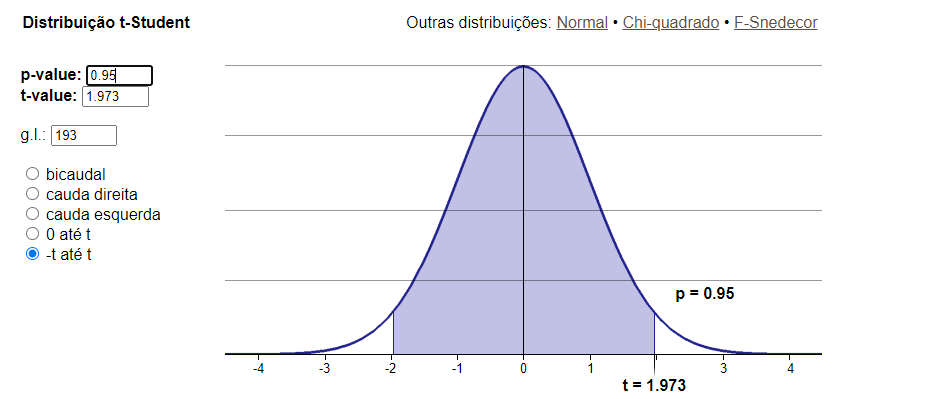

In [60]:
## teste para cada coeficiente utilizando os valores absolutos
quantil = 1.973

for i, estatistica in enumerate(np.abs(est_t_test)):
    if estatistica > quantil:
        print("beta{} é estatisticamente significante".format([i]))
    else:
        print("beta{} não é estatisticamente significante".format([i]))

beta[0] é estatisticamente significante
beta[1] é estatisticamente significante
beta[2] não é estatisticamente significante
beta[3] é estatisticamente significante
beta[4] é estatisticamente significante
beta[5] é estatisticamente significante
beta[6] não é estatisticamente significante


O teste t para os coeficientes mostra que as variáveis **imc** e **estudo** não são estatisticamente significantes para o modelo, pelo fato dos valores das suas estatísticas de teste recaírem na região crítica da distribuição

## f) 
Qual a variação esperada no escore de desempenho para um aumento de 1% de massa gorda, mantendo fixas as demais variáveis?

In [61]:
betas[4]

array([-1.34870955])

Respeitando o conceito _ceteris paribus_ (mantendo todas as demais condições fixas), espera-se um decréscimo de aproximadamente 1,3487 no escore ao diminuir 1% de massa gorda.

## g)
Qual a variação esperada no escore de desempenho para 1 ano a mais de idade, mantendo fixas as demais variáveis?

In [62]:
## ceteris paribus
betas[1]

array([-0.55917772])

Deixando as demais situações fixas, com o aumento de um ano na idade, nota-se o decréscimo de 0.55 no escore. 

## h)
Qual a variação esperada no escore de desempenho para 20 reais semanais a mais gastos com suplementos alimentares?

In [63]:
print("Influência em 1 real: ", float(betas[5]))
print("Influência para 20 reais: ", float(betas[5]*20))

Influência em 1 real:  0.09559331319857733
Influência para 20 reais:  1.9118662639715467


Alocando as demais variáveis constantes, espera-se um aumento de 1.91 no percentual do escore ao utilizar 20 reais a mais com gastos de suplementos alimentares.

## i) 
Obtenha intervalos de confiança (95%) para os parâmetros do modelo

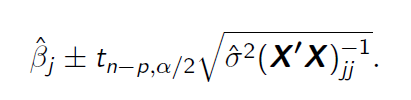

matriz $(X'X)_{jj}^{-1}$

In [64]:
## Calculada na parte dos testes estatísticos para os coeficientes
diagonal

array([2.97687639e+00, 1.12607286e-03, 3.98321149e-03, 1.55852194e-03,
       4.01179355e-03, 5.17678205e-05, 2.08667794e-03])

In [65]:
## tc =  1.973
ep_betas = np.sqrt(QMR*diagonal)
ea_betas = 1.973 * ep_betas
print("Erros-padrões dos coeficientes:\n {}".format(ep_betas)) # erros-padrões dos coeficientes
print("Erros-amostrais dos coeficientes:\n {}".format(ea_betas))# erros-amostrais dos coeficientes

Erros-padrões dos coeficientes:
 [9.31113875 0.18109466 0.34059564 0.21304868 0.34181545 0.03882865
 0.24651884]
Erros-amostrais dos coeficientes:
 [18.37087675  0.35729976  0.67199519  0.42034505  0.67440188  0.07660893
  0.48638166]


In [66]:
## Laço para calcular o intervalo para cada beta
for i, beta, erro_amostral in zip(range(len(lista_betas)), lista_betas, ea_betas):
    print("Intervalo de confiança(95%) para beta{}: \n [{:.2f}, {:.2f}]".format(i, (beta - erro_amostral), (beta + erro_amostral)))

Intervalo de confiança(95%) para beta0: 
 [65.02, 101.76]
Intervalo de confiança(95%) para beta1: 
 [-0.92, -0.20]
Intervalo de confiança(95%) para beta2: 
 [-0.90, 0.44]
Intervalo de confiança(95%) para beta3: 
 [1.19, 2.03]
Intervalo de confiança(95%) para beta4: 
 [-2.02, -0.67]
Intervalo de confiança(95%) para beta5: 
 [0.02, 0.17]
Intervalo de confiança(95%) para beta6: 
 [-0.33, 0.65]


## j)
Com base nos intervalos de confiança obtidos, você rejeitaria, ao nível de significância de 5%, a hipótese de não efeito da massa muscular no desempenho dos atletas? Justifique sua resposta;

In [67]:
print(f"coeficiente para massa muscular: {betas[4]}")

coeficiente para massa muscular: [-1.34870955]


In [68]:
print("Intervalo de confiança para a massa muscular(beta4) a 95%: [{:.2f}; {:.2f}]". format(lista_betas[4] - ea_betas[4],
                                                                             lista_betas[4] + ea_betas[4]))

Intervalo de confiança para a massa muscular(beta4) a 95%: [-2.02; -0.67]


Dado que o módulo da estatística de teste é maior que o quantil da distribuição t-student, podemos afirmar que a variável massa é estatísticamente significante. Portanto, rejeitamos a hipótese nula de que o coeficiente vale zero.

Também, o intervalo de confiança para o coefiente da massa muscular não contém zero, o que mostra que esta variável tem influência no modelo elaborado.

## k) 
Ainda com base nos intervalos de confiança, você rejeitaria a hipótese de que o desempenho caia, em média, dois pontos para 1% a mais de massa gorda? Justifique.

In [69]:
print("Intervalo de confiança para a massa muscular(beta4) a 95%: [{:.2f}; {:.2f}]". format(lista_betas[4] - ea_betas[4],
                                                                             lista_betas[4] + ea_betas[4]))

Intervalo de confiança para a massa muscular(beta4) a 95%: [-2.02; -0.67]


Não rejeitaria. Pelo fato do intervalo de confiança a cerca da variação de $\beta_{4}$ (massa gorda) poder variar até -2,02 no limite inferior. Nesse viés, existem evidências estatísticas que o escore pode diminuir em dois pontos ao incrmentar 1% de massa gorda.

l) Obtenha a elipse de 95% de confiança para os parâmetros referentes aos efeitos de massa gorda e idade. Adicionalmente, obtenha intervalos de confiança simultâneos, com nível de confiança conjunto igual a 95%. Represente num único gráfico a região de confiança e os intervalos de confiança 95% simultâneos e individuais;

In [70]:
## massa gorda

print("Intervalo de confiança para a massa gorda(beta4) a 95%: [{:.2f}; {:.2f}]". format(lista_betas[4] - ea_betas[4],
                                                                             lista_betas[4] + ea_betas[4]))

Intervalo de confiança para a massa gorda(beta4) a 95%: [-2.02; -0.67]


In [71]:
## idade

print("Intervalo de confiança para a idade(beta1) a 95%: [{:.2f}; {:.2f}]". format(lista_betas[1] - ea_betas[1],
                                                                             lista_betas[1] + ea_betas[1]))

Intervalo de confiança para a idade(beta1) a 95%: [-0.92; -0.20]


In [72]:
ic_massa = np.linspace(-2.02, -0.67, 1000)
ic_idade = np.linspace(-0.92, -0.20, 1000)

In [73]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

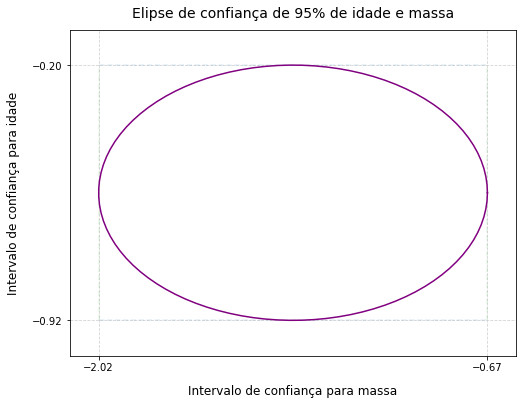

In [74]:
plt.style.use('tableau-colorblind10')

u= np.median(ic_massa)    # posição do x central
v= np.median(ic_idade)    # posição do y central
a= np.max(ic_massa) - np.median(ic_massa)    # raio do eixo-x
b= np.max(ic_idade) - np.median(ic_idade)    # raio do eixo-y

t = np.linspace(0, 2*pi, 100)

plt.figure(figsize = (8,6))
plt.plot( u+a*np.cos(t) , v+b*np.sin(t), color = 'purple')
plt.grid(color='lightgray',linestyle='--')

plt.hlines(y = min(ic_idade), xmin = min(ic_massa),
           xmax = max(ic_massa), linestyle = 'dashed', alpha = 0.1)

plt.hlines(y = max(ic_idade), xmin = min(ic_massa),
           xmax = max(ic_massa), linestyle = 'dashed',
           alpha = 0.1)

plt.vlines(x = min(ic_massa), ymin = min(ic_idade),
           ymax = max(ic_idade), linestyle = 'dashed', color = 'tab:green',
           alpha = 0.1)

plt.vlines(x = max(ic_massa), ymin = min(ic_idade),
           ymax = max(ic_idade), linestyle = 'dashed',
           color = 'tab:green', alpha = 0.1)

plt.title("Elipse de confiança de 95% de idade e massa", fontsize = 14, pad = 12)
plt.xlabel("Intervalo de confiança para massa", labelpad = 12, fontsize = 12)
plt.ylabel("Intervalo de confiança para idade", labelpad = 12,  fontsize = 12)

plt.xticks([min(ic_massa), max(ic_massa)])
plt.yticks([min(ic_idade), max(ic_idade)])

plt.xlim(min(ic_massa)- 0.1, max(ic_massa)+ 0.1)
plt.ylim(min(ic_idade)- 0.1, max(ic_idade) + 0.1)

plt.show()

## m) 
Obtenha o quadro da análise de variância e conduza o teste da hipótese nula de não significância do modelo de regressão

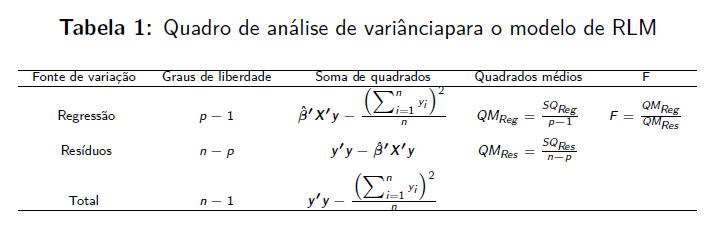

In [75]:
col_names = ['Graus de Liberdade',
                'Soma de quadrados', 'Quadrados médios', "F statistic"]
index_names = ['Regressão', 'Resíduos', 'Total']

analise_variancia = pd.DataFrame(index = index_names, columns = col_names)

In [76]:
analise_variancia

,Graus de Liberdade,Soma de quadrados,Quadrados médios,F statistic
Regressão,NaN,NaN,NaN,NaN
Resíduos,NaN,NaN,NaN,NaN
Total,NaN,NaN,NaN,NaN


In [77]:
## Graus de liberdade
gl_total = n - 1
gl_residuos = n - p
gl_regressao = p - 1

graus_de_liberdade = [gl_regressao, gl_residuos, gl_total]
graus_de_liberdade

[6, 193, 199]

In [78]:
## Soma de quadrados
SQT = np.sum((y - np.mean(y))**2)
SQR = np.sum(residuos**2)
SQreg = SQT - SQR

In [79]:
Soma_quadrados = [SQreg, SQR, SQT]
print("Soma dos quadrados totais: ", SQT)
print("Soma dos quadrados residuais: ", SQR)
print("Soma dos quadrados da regressao: ", SQreg)

Soma dos quadrados totais:  25137.68
Soma dos quadrados residuais:  5620.851400015554
Soma dos quadrados da regressao:  19516.828599984445


In [80]:
## Quadrados médios
QMR = SQR / gl_residuos
QMreg = SQreg / gl_regressao

quadrados_medios = [QMreg, QMR]

In [81]:
print("Quadrados médos residuais: ", round(QMR,4))
print("Quadrados médios da regresão: ", round(QMreg,4))

Quadrados médos residuais:  29.1236
Quadrados médios da regresão:  3252.8048


In [82]:
## F-statistic
F_statistic = QMreg / QMR
print("Estatística F: ", round(F_statistic,4))

Estatística F:  111.6897


In [83]:
gl_residuos, gl_regressao

(193, 6)

In [84]:
analise_variancia

,Graus de Liberdade,Soma de quadrados,Quadrados médios,F statistic
Regressão,NaN,NaN,NaN,NaN
Resíduos,NaN,NaN,NaN,NaN
Total,NaN,NaN,NaN,NaN


In [85]:
analise_variancia.columns

Index(['Graus de Liberdade', 'Soma de quadrados', 'Quadrados médios',
       'F statistic'],
      dtype='object')

In [86]:
analise_variancia['Graus de Liberdade'] = graus_de_liberdade
analise_variancia['Soma de quadrados'] = Soma_quadrados

In [87]:
analise_variancia.iloc[:2,2] = quadrados_medios
analise_variancia.iloc[0,3] = F_statistic

In [88]:
analise_variancia.fillna('-', inplace = True) ## colocando '-' nos espaços em branco

In [89]:
analise_variancia

,Graus de Liberdade,Soma de quadrados,Quadrados médios,F statistic
Regressão,6,19516.8286,3252.8,111.69
Resíduos,193,5620.8514,29.1236,-
Total,199,25137.6800,-,-


Teste de hipótese para o modelo de Regressão

$H_{0}$: $\beta_{0}$ = $\beta_{1}$ = $\beta_{2}$ = $\dots$ = $\beta_{k}$

$H_{1}$: $\beta_{i}$ $\neq$ 0  $\quad$: $i$ = 0, 1, 2, $\dots$ k

In [90]:
## Valor da estatística de teste
analise_variancia['F statistic']

Regressão    111.69
Resíduos          -
Total             -
Name: F statistic, dtype: object

In [91]:
## Graus de liberdade
gl_regressao, gl_residuos,

(6, 193)

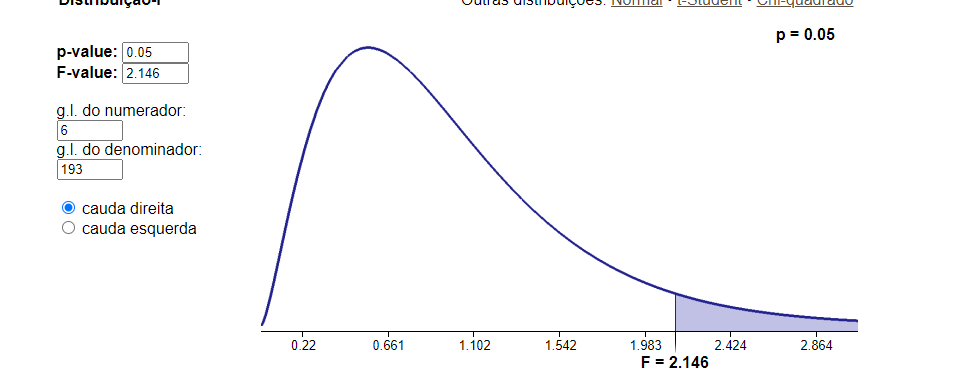

Como o valor da estatística F(111.68) é bem maior que o quantil da distribuição F-Snedecor(2.146), rejeitamos a hipótese nula. Portanto, existem evidências estatísticas de que os coeficientes não valem zero.

## n) 
Qual a estimativa para a variância dos erros aleatórios?

#### Estimador da variância dos erros ou variância da regressão

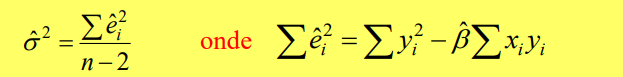

$$
\sum \limits^{200}_{\mathit{i} = 1} \hat{e_{i}}^{2} = SQR
$$

$$
\hat{\sigma^{2}} = \dfrac{SQR}{n-p}
$$

In [92]:
sigma_estimado = SQR/(n - p)
print("Estimador da variância dos erros/ variância da regressão: ", round(sigma_estimado,4))

Estimador da variância dos erros/ variância da regressão:  29.1236


## o) 
Obtenha o coeficiente de determinação e o coeficiente de determinação ajustado. Interprete-os;

### R quadrado
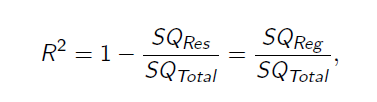

In [93]:
SQreg, SQT

(19516.828599984445, 25137.68)

In [94]:
R_quadrado = SQreg / SQT
print("O coeficiente de R²: ", round(R_quadrado,4))

O coeficiente de R²:  0.7764


O modelo ajustado consegue explicar 77,64% da variação no escore.

### R quadrado ajustado
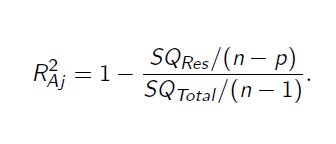

In [95]:
numerador = SQR / (n - p)
denominador = SQT / (n - 1)
R_quadrado_ajustado = 1 - (numerador/denominador)
print("O coeficiente de R quadrado ajustado é: ", round(R_quadrado_ajustado, 4))

O coeficiente de R quadrado ajustado é:  0.7694


Desconsiderando o as grandezas das variáveis, o modelo ajustado consegue explicar 76,94% da variação que ocorre no escore.

## p) 
Ajuste um novo modelo de regressão, desta vez desconsiderando a variável massa gorda. Compare os resultados dos dois ajustes. O que houve com o efeito da variável imc? Justifique.

In [96]:
df.head()

,escore,idade,imc,horas,massa,gasto,estudo
1,79.6,30,20.5,19,21.66,72,15
2,80.7,30,21.0,23,20.50,130,15
3,65.6,23,21.3,13,19.39,68,10
4,75.0,23,22.7,16,23.41,64,11
5,84.6,27,22.6,20,20.72,101,12


In [97]:
X2 = df.drop(columns= {'escore', 'massa'}) ## excluindo as variáveis escore e massa
y2 = df.iloc[:,0] ## a variável massa

In [98]:
X2.head() ## Apenas 4 variáveis agora

,idade,imc,horas,gasto,estudo
1,30,20.5,19,72,15
2,30,21.0,23,130,15
3,23,21.3,13,68,10
4,23,22.7,16,64,11
5,27,22.6,20,101,12


In [99]:
y2.head()

1    79.6
2    80.7
3    65.6
4    75.0
5    84.6
Name: escore, dtype: float64

In [100]:
ones = np.repeat(1, len(X))
X2_matrix = np.hstack([ones.reshape(-1,1), X2.values])
X2_matrix

array([[  1. ,  30. ,  20.5,  19. ,  72. ,  15. ],
       [  1. ,  30. ,  21. ,  23. , 130. ,  15. ],
       [  1. ,  23. ,  21.3,  13. ,  68. ,  10. ],
       ...,
       [  1. ,  27. ,  23. ,  20. ,  99. ,  15. ],
       [  1. ,  18. ,  21.1,  11. ,  59. ,   9. ],
       [  1. ,  24. ,  21.2,  15. ,  59. ,  10. ]])

In [101]:
y2_vector = y2.values.reshape(-1,1)
y2_vector.shape

(200, 1)

In [102]:
parte1_2 = np.linalg.inv(np.matmul(X2_matrix.T,X2_matrix))
parte2_2 = np.matmul(X2_matrix.T, y2_vector)
betas2 = np.matmul(parte1_2, parte2_2)
lista_betas2 = betas2.reshape(1,-1).tolist()[0]
betas2

array([[63.87993674],
       [-0.55230167],
       [-0.66189787],
       [ 1.17416758],
       [ 0.18436413],
       [ 0.23415144]])

In [103]:
print("Valores dos betas sem a variável massa: \n {}".format(lista_betas))
print("\n Valores dos betas com a variável massa: \n {}".format(lista_betas2))

Valores dos betas sem a variável massa: 
 [83.39355814 -0.55917772 -0.22909211  1.60564943 -1.34870955  0.09559331
  0.15886723]

 Valores dos betas com a variável massa: 
 [63.87993673868664, -0.5523016722303282, -0.6618978668286104, 1.1741675821802744, 0.1843641270961598, 0.2341514359784469]


#### Efeito da variável imc

In [104]:
print("Efeito da variável imc com a variável massa gorda: {:.4f}".format(lista_betas[2]))
print("Efeito da variável imc sem a variável massa gorda: {:.4f}".format(lista_betas2[1]))

Efeito da variável imc com a variável massa gorda: -0.2291
Efeito da variável imc sem a variável massa gorda: -0.5523


Quando eliminamos a variável de massa gorda do conjunto de variáveis explicativas, o imc dimuinui mais o   escore( respeitando o critério _ceteris paribus_)

## q)
Voltando ao modelo original, teste a significância conjunta das variáveis imc e estudo. De acordo com o resultado do teste, poderíamos excluir ambas as variáveis do modelo ao nível de 5% de significância?

In [105]:
## módulo do quantil com (200-7) graus de liberdade e 95% de confiança: 1.973
quantil = 1.973

for i, estatistica in enumerate(np.abs(est_t_test)):
    if estatistica > quantil:
        print("beta{} é estatisticamente significante".format([i]))
    else:
        print("beta{} não é estatisticamente significante".format([i]))

beta[0] é estatisticamente significante
beta[1] é estatisticamente significante
beta[2] não é estatisticamente significante
beta[3] é estatisticamente significante
beta[4] é estatisticamente significante
beta[5] é estatisticamente significante
beta[6] não é estatisticamente significante


#### $\beta_{2}$ == imc
#### $\beta_{4}$ == massa
Ao relizar o teste t para cada um dos coeficientes estimados, temos que beta 2( imc) não se mostra estatisticamente significante, enquanto que a variável massa se mostra estatisticamente significante. Desse modo, seria adequado excluir apenas imc do modelo e, logo após, retreiná-lo para observar seu comportamento.


## r)
Considere os seguintes perfis de atletas:

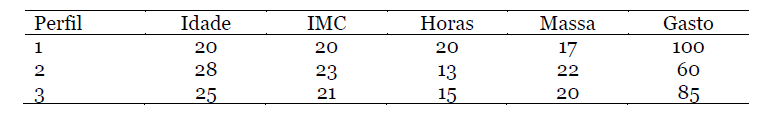

Para cada um dos perfis apresente um intervalo de confiança (95%) para o escore médio de desempenho e um intervalo de predição (95%) para o escore de um novo atleta com as características apresentadas;

In [106]:
betas

array([[83.39355814],
       [-0.55917772],
       [-0.22909211],
       [ 1.60564943],
       [-1.34870955],
       [ 0.09559331],
       [ 0.15886723]])

In [107]:
perfis = {'idade': [10,28,25],
         'imc': [20,23,21],
         'horas': [20,13,15],
         'massa': [17,22,20],
         'gasto': [100,60,85]}

In [108]:
perfis_matrix = pd.DataFrame(perfis).values
perfis_matrix = np.hstack([np.repeat(1, len(perfis_matrix)).reshape(-1,1), perfis_matrix])

In [109]:
perfis_matrix.shape, betas[:-1].shape ## tiramos a últimav pois não coletamos estudo 

((3, 6), (6, 1))

In [110]:
perfis_matrix

array([[  1,  10,  20,  20,  17, 100],
       [  1,  28,  23,  13,  22,  60],
       [  1,  25,  21,  15,  20,  85]], dtype=int64)

In [111]:
np.matmul(perfis_matrix, betas[:-1]) ## A previsões para os perfis 1, 2 e 3

array([[91.96419629],
       [59.40489469],
       [69.83916287]])

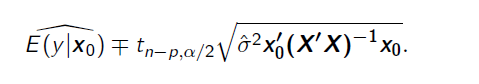

In [112]:
QMR ## sigma quadrado estimado

29.123582383500278

In [113]:
X_perfis = X_matrix.copy()
X_perfis

array([[  1.  ,  30.  ,  20.5 , ...,  21.66,  72.  ,  15.  ],
       [  1.  ,  30.  ,  21.  , ...,  20.5 , 130.  ,  15.  ],
       [  1.  ,  23.  ,  21.3 , ...,  19.39,  68.  ,  10.  ],
       ...,
       [  1.  ,  27.  ,  23.  , ...,  21.69,  99.  ,  15.  ],
       [  1.  ,  18.  ,  21.1 , ...,  19.52,  59.  ,   9.  ],
       [  1.  ,  24.  ,  21.2 , ...,  21.07,  59.  ,  10.  ]])

In [114]:
df.columns[1:-1] ## todas as variáveis menos estudo

Index(['idade', 'imc', 'horas', 'massa', 'gasto'], dtype='object')

In [115]:
X_perfis = X_perfis[:,:-1]
X_perfis

array([[  1.  ,  30.  ,  20.5 ,  19.  ,  21.66,  72.  ],
       [  1.  ,  30.  ,  21.  ,  23.  ,  20.5 , 130.  ],
       [  1.  ,  23.  ,  21.3 ,  13.  ,  19.39,  68.  ],
       ...,
       [  1.  ,  27.  ,  23.  ,  20.  ,  21.69,  99.  ],
       [  1.  ,  18.  ,  21.1 ,  11.  ,  19.52,  59.  ],
       [  1.  ,  24.  ,  21.2 ,  15.  ,  21.07,  59.  ]])

In [116]:
perfis_matrix

array([[  1,  10,  20,  20,  17, 100],
       [  1,  28,  23,  13,  22,  60],
       [  1,  25,  21,  15,  20,  85]], dtype=int64)

### Predizendo os perfis

In [117]:
predicoes_perfis = np.matmul(perfis_matrix,betas[:-1])
predicoes_perfis

array([[91.96419629],
       [59.40489469],
       [69.83916287]])

### Caculando a variância das predições dos perfis

In [118]:
matrix_inversa_perfis = np.linalg.inv(np.matmul(X_perfis.T, X_perfis))
matrix_inversa_perfis.shape

(6, 6)

In [119]:
perfis_matrix.shape, matrix_inversa_perfis.shape

((3, 6), (6, 6))

In [120]:
perfil1 = perfis_matrix[0].reshape(-1,1)
perfil2 = perfis_matrix[1].reshape(-1,1)
perfil3 = perfis_matrix[2].reshape(-1,1)

In [121]:
var_perfil1 = np.matmul(np.matmul(QMR*perfil1.T, matrix_inversa_perfis), perfil1)
var_perfil2 = np.matmul(np.matmul(QMR*perfil2.T, matrix_inversa_perfis), perfil2)
var_perfil3 = np.matmul(np.matmul(QMR*perfil3.T, matrix_inversa_perfis), perfil3)

In [122]:
variancias_perfis = [float(var_perfil1), float(var_perfil2), float(var_perfil3)]

In [123]:
for i in range(3):
    print("Variância do perfil{} : {:.4f}".format(i + 1, variancias_perfis[i]))

Variância do perfil1 : 5.4699
Variância do perfil2 : 0.7785
Variância do perfil3 : 0.4452


### Quantil da distribuição _t-student_ com 95% de confiança e 194 graus de liberdade
### tc = 1.973

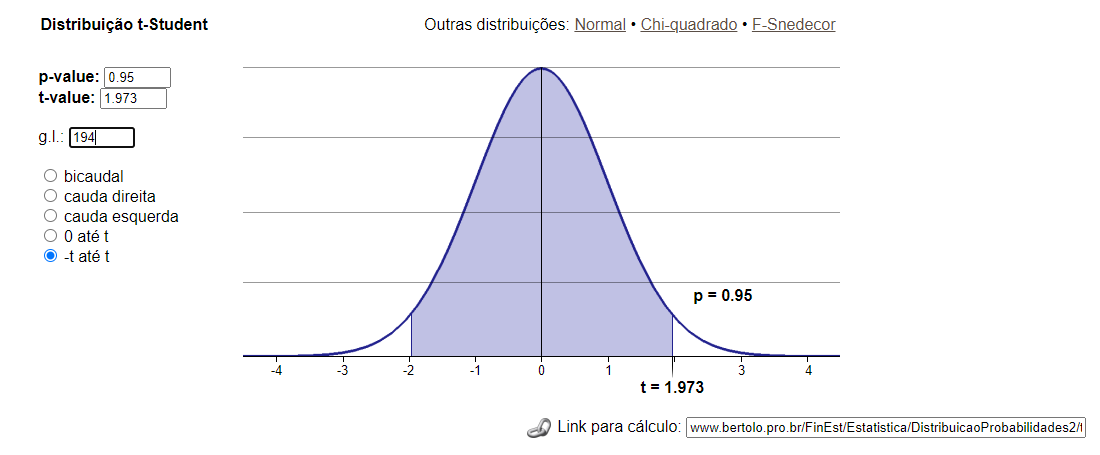

In [124]:
tc = 1.973

In [125]:
## Intervalo de predição para o perfil 1 a 95% de confiança
li1 = float(predicoes_perfis[0]) - (tc*np.sqrt(variancias_perfis[0]))
ls1 = float(predicoes_perfis[0]) + (tc*np.sqrt(variancias_perfis[0]))
print("A predição para o perfil 1 é de: {:.4f} \n O intervalo de confiança de 95% fica como[{:.4f}, {:.4f}]".format(float(predicoes_perfis[0]), li1, ls1))

A predição para o perfil 1 é de: 91.9642 
 O intervalo de confiança de 95% fica como[87.3498, 96.5786]


In [126]:
## Intervalo de predição para o perfil 2 a 95% de confiança
li2 = float(predicoes_perfis[1]) - (tc*np.sqrt(variancias_perfis[1]))
ls2 = float(predicoes_perfis[1]) + (tc*np.sqrt(variancias_perfis[1]))
print("A predição para o perfil 2 é de: {:.4f} \n O intervalo de confiança de 95% fica como[{:.4f}, {:.4f}]".format(float(predicoes_perfis[1]), li2, ls2))

A predição para o perfil 2 é de: 59.4049 
 O intervalo de confiança de 95% fica como[57.6641, 61.1457]


In [127]:
## Intervalo de predição para o perfil 3 a 95% de confiança
li3 = float(predicoes_perfis[2]) - (tc*np.sqrt(variancias_perfis[2]))
ls3 = float(predicoes_perfis[2]) + (tc*np.sqrt(variancias_perfis[2]))
print("A predição para o perfil 3 é de: {:.4f} \n O intervalo de confiança de 95% fica como[{:.4f}, {:.4f}]".format(float(predicoes_perfis[2]), li3, ls3))

A predição para o perfil 3 é de: 69.8392 
 O intervalo de confiança de 95% fica como[68.5228, 71.1556]


## s)
Faça um gráfico de escores observados versus escores ajustados pelo modelo. Acrescente ao gráfico a reta identidade;

In [128]:
sns.set_style('darkgrid')

In [129]:
predicoes_lista = predicoes.reshape(1,-1).tolist()[0]
residuos_lista = residuos.tolist()[0]

In [130]:
line = np.linspace(start = 40, stop = 100, num = 200)

Plotando os valores idealizados vs os valores preditos pelo modelo:

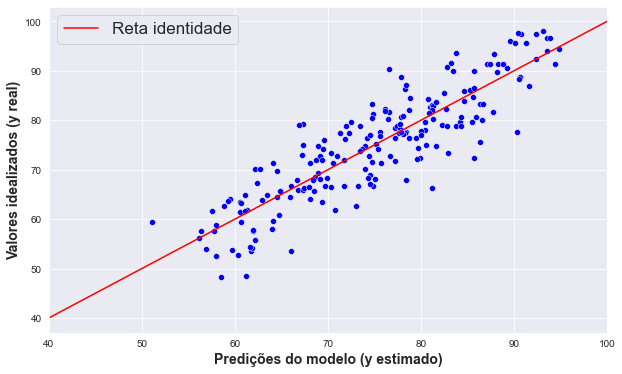

In [131]:
plt.figure(figsize = (10,6))

sns.lineplot(line, line, color = 'red', label = 'Reta identidade')
sns.scatterplot(predicoes_lista,y, color = 'blue')

plt.xlabel("Predições do modelo (y estimado)",fontweight = 'bold', fontsize = 14)
plt.ylabel("Valores idealizados (y real)", fontweight = 'bold', fontsize = 14)
plt.xlim(40,100)

plt.legend(fontsize = 17)
plt.show()

## t)
Faça um gráfico de resíduos versus escores ajustados. Como os resíduos estão distribuídos?

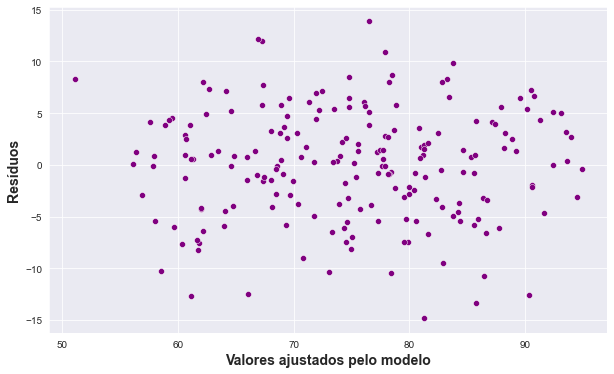

In [132]:
plt.figure(figsize = (10,6))
sns.scatterplot(predicoes_lista,residuos_lista, color = 'purple')
plt.xlabel("Valores ajustados pelo modelo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Resíduos", fontweight = 'bold', fontsize = 14)


plt.show()

Os resíduos se comportam de maneira dispersa, isto é, percebe-se a formação de uma nuvem dispersa de pontos. Esta característica pode ser um indicativo de homocedasticidade.

## u)
Padronize cada uma das variáveis explicativas e ajuste um novo modelo de regressão, substituindo as variáveis originais pelas padronizadas. Qual das variáveis apresenta maior efeito no escore de desempenho? Qual a interpretação das estimativas obtidas?

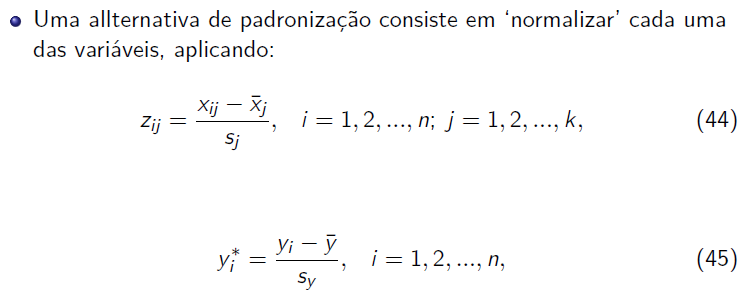

Média amostral de cada variável coloteda:

In [133]:
medias_amostrais = X.mean(axis = 0)
medias_amostrais

array([24.42   , 21.6895 , 17.77   , 20.83765, 84.     , 11.155  ])

Desvio padrão de cada variável coletada:

In [134]:
desvios_padroes_amostrais = X.std(axis = 0)
desvios_padroes_amostrais 

array([ 2.8746478 ,  1.2294876 ,  4.38259056,  1.49759807, 25.48215062,
        2.1239056 ])

In [135]:
X.shape[1]

6

In [136]:
## Criando uma matrix para salvar os valores
X_escalonado = np.ones(shape = (200,6))
X_escalonado[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [137]:
(X[:,0] - medias_amostrais[0]) / desvios_padroes_amostrais[0]

for i in range(X.shape[1]):
    X_escalonado[:,i] = (X[:,i] - medias_amostrais[i]) / desvios_padroes_amostrais[i]


In [138]:
X_escalonado

array([[ 1.94110736, -0.96747621,  0.28065592,  0.54911262, -0.47091787,
         1.81034411],
       [ 1.94110736, -0.56080273,  1.19335811, -0.22546103,  1.80518515,
         1.81034411],
       [-0.49397356, -0.31679864, -1.08839736, -0.96664788, -0.62789049,
        -0.54380948],
       ...,
       [ 0.89750125,  1.06589119,  0.50883147,  0.5691447 ,  0.58864733,
         1.81034411],
       [-2.23331707, -0.47946803, -1.54474846, -0.87984221, -0.98107889,
        -1.0146402 ],
       [-0.14610485, -0.39813334, -0.63204627,  0.15514844, -0.98107889,
        -0.54380948]])

In [139]:
X_escalonado.shape ## 200 observações por 6 colunas, todos os valores estão escalonados

(200, 6)

In [140]:
X_escalonado_matrix = np.hstack([ones.reshape(-1,1), X_escalonado])
pd.DataFrame(X_escalonado_matrix)

,0,1,2,3,4,5,6
0,1.0,1.941107,-0.967476,0.280656,0.549113,-0.470918,1.810344
1,1.0,1.941107,-0.560803,1.193358,-0.225461,1.805185,1.810344
2,1.0,-0.493974,-0.316799,-1.088397,-0.966648,-0.627890,-0.543809
3,1.0,-0.493974,0.821887,-0.403871,1.717650,-0.784863,-0.072979
4,1.0,0.897501,0.740552,0.508831,-0.078559,0.667134,0.397852
...,...,...,...,...,...,...,...
195,1.0,-0.493974,-0.154129,-1.544748,-0.439137,-1.569726,-0.072979
196,1.0,-1.189711,-2.187497,1.193358,-1.814672,1.177295,-0.072979
197,1.0,0.897501,1.065891,0.508831,0.569145,0.588647,1.810344
198,1.0,-2.233317,-0.479468,-1.544748,-0.879842,-0.981079,-1.014640


Escalonando a variável predita (escore):

In [141]:
print("média y : ", y_vetor.mean(),"/ desvio padrão y: ", y_vetor.std()) ## média e desvio padrão de escore
y_media = y_vetor.mean()
y_dp =  y_vetor.std()

média y :  75.0 / desvio padrão y:  11.211083801310203


In [142]:
y_escalonado = (y_vetor - y_media) / y_dp
y_escalonado.shape

(200, 1)

In [143]:
betas_padronizados = np.linalg.inv(np.matmul(X_escalonado_matrix.T, X_escalonado_matrix))
betas_padronizados = np.matmul(betas_padronizados,np.matmul(X_escalonado_matrix.T, y_escalonado))

In [144]:
betas_padronizados ## betas calculados com padronização

array([[-1.39940799e-16],
       [-1.43379448e-01],
       [-2.51238788e-02],
       [ 6.27673842e-01],
       [-1.80163208e-01],
       [ 2.17278119e-01],
       [ 3.00969126e-02]])

In [145]:
betas ## betas normais

array([[83.39355814],
       [-0.55917772],
       [-0.22909211],
       [ 1.60564943],
       [-1.34870955],
       [ 0.09559331],
       [ 0.15886723]])

- Ao analisar a diferença entre os betas normais e os betas padronizados, percebe-se a diferença no valor do intercepto, o qual não é mais afetado na segunda versão pela magnitude das variáveis.

- Quando padroniza-se tanto as variavéis explicativas quando a predita, nota-se que o valor de $\beta_{4}$ (massa) é o que mais afeta o modelo, o qual aumenta cerca de 6.28 pontos no escore a cada incrmento de uma unidade, considerando o critério _ceteris paribus_.

Predizendo os valores para os valores escolonados. Agora, vamos ter o valor de y predito e escalonado.

In [146]:
X_escalonado_matrix.shape, betas_padronizados.shape

((200, 7), (7, 1))

In [147]:
y_escalonado_pred = np.matmul(X_escalonado_matrix, betas_padronizados)
y_escalonado_pred.shape

(200, 1)

Vamos avaliar o desempenho dos dois modelos utilizando as métricas: Erro Quadrático Médio(EQM), Erro Absoluto Médio(EAM) e R².

In [148]:
print("EQM para as predições sem escalonamento: {:.4f}".format(mean_squared_error(y_vetor, predicoes)))
print("EQM para as predições com escalonamento: {:.4f}".format(mean_squared_error(y_escalonado, y_escalonado_pred)))

EQM para as predições sem escalonamento: 28.1043
EQM para as predições com escalonamento: 0.2236


In [149]:
print("EAM para as predições sem escalonamento: {:.4f}".format(mean_absolute_error(y_vetor, predicoes)))
print("EAM para as predições com escalonamento: {:.4f}".format(mean_absolute_error(y_escalonado, y_escalonado_pred)))

EAM para as predições sem escalonamento: 4.2162
EAM para as predições com escalonamento: 0.3761


In [150]:
print("R² ajustado para os valores sem escalonamento: {:.4f}".format(r2_score(y_vetor, predicoes)))
print("R² ajustado para os valores com escalonamento: {:.4f}".format(r2_score(y_escalonado, y_escalonado_pred)))

R² ajustado para os valores sem escalonamento: 0.7764
R² ajustado para os valores com escalonamento: 0.7764


Devido a grandeza das variáveis, nota-se que as métricas do Erro Quadrático Médio(EQM) e Erro Absoluto Médio(EAM) sofrem uma grande influência quando são calculados, os quais se adequam aos valores utilizados na predição. Por outro lado, o valor do R² ajustado apresenta-se inalterado mesmo com o escalonamento aplicado, tal fato evidencia que esta medida é universal em termos das escalas de medidas, de fato,  quando aplica-se a padronização tanto no conjunto de variáveis explicativas, quanto na variável dependente.